In [ ]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]
def printToken(token):
    print(token.text, "->", token.dep_)
def appendChunk(original, chunk):
    return original + ' ' + chunk
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)
def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())
def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='skyblue', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

Bhubaneswar is the capital and largest city of the Indian state of Odisha. The city is bounded by the Daya River to the south and the Kuakhai River to the east; the Chandaka Wildlife Sanctuary and Nandankanan Zoo lie in the western and northern parts of Bhubaneswar.Bhubaneswar is categorised as a Tier-2 city.Bhubaneswar and Cuttack are often referred to as the 'twin cities of Odisha'. The city has a population of 1163000.
Bhubaneswar -> nsubj
is -> ROOT
the -> det
capital -> attr
and -> cc
largest -> amod
city -> conj
of -> prep
the -> det
Indian -> amod
state -> pobj
of -> prep
Odisha -> pobj
. -> punct
Bhubaneswar , be capital large indian , state Odisha
The -> det
city -> nsubjpass
is -> auxpass
bounded -> ccomp
by -> agent
the -> det
Daya -> compound
River -> pobj
to -> prep
the -> det
south -> pobj
and -> cc
the -> det
Kuakhai -> compound
River -> conj
to -> prep
the -> det
east -> pobj
; -> punct
the -> det
Chandaka -> compound
Wildlife -> compound
Sanctuary -> nsubj
and -> cc
Na

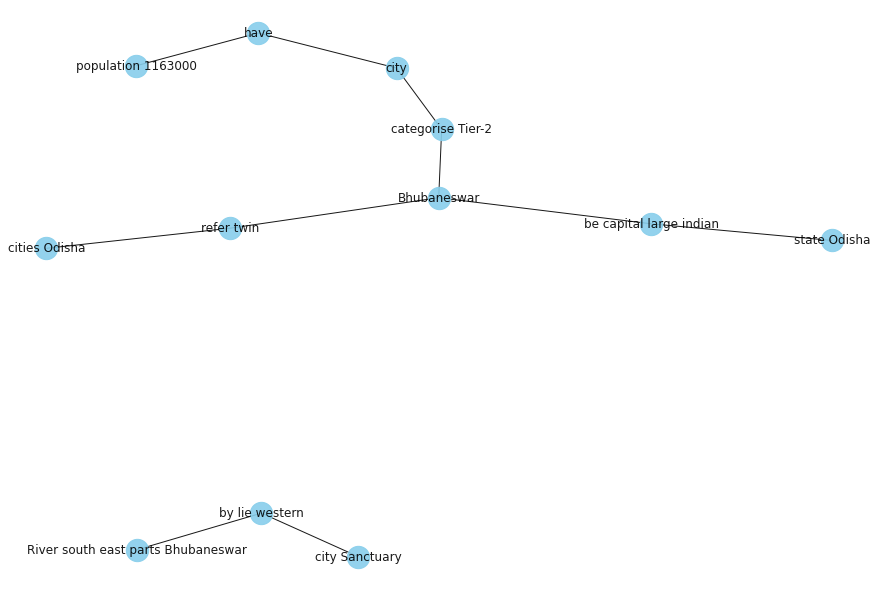

In [ ]:
if __name__ == "__main__":
       text = "Bhubaneswar is the capital and largest city of the Indian state of Odisha. The city is bounded by the Daya River " \
            "to the south and the Kuakhai River to the east; the Chandaka Wildlife Sanctuary "\
            "and Nandankanan Zoo lie in the western and northern parts of Bhubaneswar." \
            "Bhubaneswar is categorised as a Tier-2 city." \
            "Bhubaneswar and Cuttack are often referred to as the 'twin cities of Odisha'. " \
            "The city has a population of 1163000."        
sentences = getSentences(text)
nlp_model = spacy.load('en_core_web_sm')
triples = []
print (text)
for sentence in sentences:
    triples.append(processSentence(sentence))
printGraph(triples)

### WEB SCRAPING STARTS

In [ ]:
a=[]

In [ ]:
b=[1,2,3]

In [ ]:
a = a.append(b)
print(a)

None


In [ ]:
import urllib.request as urllib2
site= "https://seekingalpha.com/latest-articles"
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

req = urllib2.Request(site, headers=hdr)
page = urllib2.urlopen(req)
content = page.read()
print(content)

b'<!DOCTYPE html><html itemscope="" itemtype="https://schema.org/WebPage" lang="en"><head profile="http://a9.com/-/spec/opensearch/1.1/"><meta charset="utf-8" /><meta content="IE=edge" http-equiv="X-UA-Compatible" /><meta content="width=device-width" name="viewport" /><link href="https://https://seekingalpha.com/javascripts/seeking.xml" rel="search" title="Seeking Alpha&#39;s Symbol search" type="application/opensearchdescription+xml" /><title>Latest Financial Analysis &amp; Opinion | Seeking Alpha</title><meta content="Seeking Alpha" name="application-name" /><meta content="true" name="HandheldFriendly" /><meta content="com.seekingalpha.Web" name="appleid-signin-client-id" /><meta content="name email" name="appleid-signin-scope" /><meta content="https://seekingalpha.com/auth/apple/sign-in" name="appleid-signin-redirect-uri" /><meta content="/latest-articles" name="appleid-signin-state" /><meta content="Seeking Alpha is the leading financial website for crowdsourced opinion and analysi

In [ ]:
import requests
page = requests.get("https://seekingalpha.com/latest-articles")
page

<Response [200]>

In [ ]:
page.content

b'<!DOCTYPE html><html itemscope="" itemtype="https://schema.org/WebPage" lang="en"><head profile="http://a9.com/-/spec/opensearch/1.1/"><meta charset="utf-8" /><meta content="IE=edge" http-equiv="X-UA-Compatible" /><meta content="width=device-width" name="viewport" /><link href="https://https://seekingalpha.com/javascripts/seeking.xml" rel="search" title="Seeking Alpha&#39;s Symbol search" type="application/opensearchdescription+xml" /><title>Latest Financial Analysis &amp; Opinion | Seeking Alpha</title><meta content="Seeking Alpha" name="application-name" /><meta content="true" name="HandheldFriendly" /><meta content="com.seekingalpha.Web" name="appleid-signin-client-id" /><meta content="name email" name="appleid-signin-scope" /><meta content="https://seekingalpha.com/auth/apple/sign-in" name="appleid-signin-redirect-uri" /><meta content="/latest-articles" name="appleid-signin-state" /><meta content="Seeking Alpha is the leading financial website for crowdsourced opinion and analysi

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
# print(soup.prettify())

In [ ]:
articles = soup.find_all('ul', class_='articles-list')
# for n in x:
print(articles)


[<ul class="articles-list" id="articles-list"><li article_id="4391274" class="article media" data-user-id="101639"><div class="media-left"><a href="/author/sa-transcripts"><img height="40" src="https://static3.seekingalpha.com/images/users_profile/000/101/639/medium_pic.png" width="40"/></a></div><div class="media-body"><a class="a-title" href="/article/4391274-iclick-interactive-asia-group-limited-2020-q3-results-earnings-call-presentation" sasource="list_1">iClick Interactive Asia Group Limited 2020 Q3 - Results - Earnings Call Presentation</a><div class="a-info"><span><a href="/symbol/ICLK" title="iClick Interactive Asia Group Limited">ICLK</a></span><span class="bullet">•</span> <span>Today, 11:41 AM</span> <span class="bullet">•</span> <a href="/author/sa-transcripts">SA Transcripts</a></div></div></li><li article_id="4391273" class="article media" data-user-id="489376"><div class="media-left"><a href="/author/quandaryfx"><img height="40" src="https://static.seekingalpha.com/image

In [ ]:
for item in articles:
        heading = item.find_all('a',{'class':'a-title'})
        heading = [i.get_text() for i in heading]
        #rating_list.append(rating)
        urls = item.find_all('a',{'class':'a-title'})
        urls = ['https://seekingalpha.com'+i['href'] for i in urls]
        total_details=[]
        timestamps = []
        for url in urls:
          subpage = requests.get(url)
          subsoup = BeautifulSoup(subpage.content, 'html.parser')
          time = subsoup.find('time')
          timestamps.append(time)
          main_article = subsoup.find_all('div', class_='sa-art article-width ')
          #for para in main_article:
            #detail_text = para.find_all('p')
            ## detail_text = [j.get_text() for j in detail_text]
            #for j in detail_text:
              #total_details.append(j.get_text())
            ## total_details.append(detail_text)

        # #rev_head_list.append(review_head)
        # detail_review = item.find_all('div',{'class':'qwjRop'})
        # detail_review = [i.get_text() for i in detail_review]
        # detail_review = [i.strip('READ MORE') for i in detail_review]
        # user_name = item.find_all('p',{'class':'_3LYOAd _3sxSiS'})
        # user_name = [i.get_text() for i in user_name]

In [ ]:
timestamps = []
for url in urls:
  subpage = requests.get(url)
  subsoup = BeautifulSoup(subpage.content, 'html.parser')
  time = subsoup.find('time')
  # if timestamps is None:
  #   time = timestamps[0]
  # else:
  timestamps.append(time)


# timestamps = [time['content'] for time in timestamps]
# for time in timestamps:
#   try:
#     time = time['content'][:10]      
#   except:
#     time = 'NO DATA'
    # timestamps.append(time)
    

timestamps

[<time content="2020-11-24T16:41:07Z">Nov. 24, 2020 11:41 AM ET</time>,
 <time content="2020-11-24T16:39:27Z">Nov. 24, 2020 11:39 AM ET</time>,
 <time content="2020-11-24T16:37:27Z">Nov. 24, 2020 11:37 AM ET</time>,
 <time content="2020-11-24T16:34:00Z">Nov. 24, 2020 11:34 AM ET</time>,
 <time content="2020-11-24T16:27:53Z">Nov. 24, 2020 11:27 AM ET</time>,
 <time content="2020-11-24T16:24:11Z">Nov. 24, 2020 11:24 AM ET</time>,
 <time content="2020-11-24T16:16:07Z">Nov. 24, 2020 11:16 AM ET</time>,
 <time content="2020-11-24T16:14:04Z">Nov. 24, 2020 11:14 AM ET</time>,
 <time content="2020-11-24T16:09:15Z">Nov. 24, 2020 11:09 AM ET</time>,
 <time content="2020-11-24T16:05:33Z">Nov. 24, 2020 11:05 AM ET</time>,
 <time content="2020-11-24T16:05:25Z">Nov. 24, 2020 11:05 AM ET</time>,
 <time content="2020-11-24T16:00:10Z">Nov. 24, 2020 11:00 AM ET</time>,
 <time content="2020-11-24T15:54:17Z">Nov. 24, 2020 10:54 AM ET</time>,
 <time content="2020-11-24T15:51:10Z">Nov. 24, 2020 10:51 AM ET<

In [ ]:
# timestamps = [time.get_text() for time in timestamps]
# timestamps
timestamps[0]['content'][:10]

'2020-11-24'

In [ ]:
len(heading)

75

In [ ]:
heading

['Travelers, State Farm, And Nationwide Make $60M Bet On 3D Measurement App HOVER, Fueling E-Commerce Portal Growth',
 'Pure Storage: A Solid Play On The Cloud',
 'Choice Properties: This 5.5% Yielder Collects Almost 100% Of The Rent And Launches A Buyback Program',
 'Dividend Challenger Highlights: Week Of November 22',
 'Dividend Champion And Contender Highlights: Week Of November 22',
 'Stock Holders Face Capital Loss And Negative Return Prospects... No Cake And Eat It Too',
 'Shutdown Gloom Negates Housing Boom',
 'Forget The 4% Rule, 4.5% Rule, Or Any Rule Forcing You To Sell',
 'Fat Tails Everywhere? Profiling Extreme Returns: Part IV',
 '5 Best CEFs To Buy This Month (November 2020)',
 'Fall 2020 Snapshot Of Expected Future S&P 500 Earnings',
 'Swiss Re Targets Higher P&C Reinsurance Profits',
 'Wall Street Breakfast: What Moved Markets',
 'Xeris Pharmaceuticals: Marketed Product Company With Platform And Soros Investment Makes Me More Bullish',
 "Billionaire Investor Says 'Buy 

In [ ]:
len(urls)

75

In [ ]:
urls

['https://seekingalpha.com/article/4391274-iclick-interactive-asia-group-limited-2020-q3-results-earnings-call-presentation',
 'https://seekingalpha.com/article/4391273-sgdj-interesting-gold-etf-set-to-shine',
 'https://seekingalpha.com/article/4391272-xiaomi-corporation-2020-q3-results-earnings-call-presentation',
 'https://seekingalpha.com/article/4391271-eastman-kodak-is-now-on-wrong-side-of-political-risk',
 'https://seekingalpha.com/article/4391270-amza-cuts-and-amza-soars',
 'https://seekingalpha.com/article/4391268-anaplan-inc-2021-q3-results-earnings-call-presentation',
 'https://seekingalpha.com/article/4391266-s-and-p-inclusion-and-teslas-future',
 'https://seekingalpha.com/article/4391267-j-m-smucker-company-sjm-ceo-mark-smucker-on-q2-2021-results-earnings-call-transcript',
 'https://seekingalpha.com/article/4391265-xprescheck-is-building-presence-while-fighting-covid-along-way',
 'https://seekingalpha.com/article/4391264-idacorp-premier-utility-strong-dividend-growth',
 'ht

In [ ]:
#detail_text[0]

NameError: ignored

In [ ]:
# for j in detail_text:
#   print(j)
len(total_details)

75

In [ ]:
# total_details

In [ ]:
len(timestamps)

75

In [ ]:
timestamps

[<time content="2020-11-24T16:41:07Z">Nov. 24, 2020 11:41 AM ET</time>,
 <time content="2020-11-24T16:39:27Z">Nov. 24, 2020 11:39 AM ET</time>,
 <time content="2020-11-24T16:37:27Z">Nov. 24, 2020 11:37 AM ET</time>,
 None,
 <time content="2020-11-24T16:27:53Z">Nov. 24, 2020 11:27 AM ET</time>,
 <time content="2020-11-24T16:24:11Z">Nov. 24, 2020 11:24 AM ET</time>,
 <time content="2020-11-24T16:16:07Z">Nov. 24, 2020 11:16 AM ET</time>,
 <time content="2020-11-24T16:14:04Z">Nov. 24, 2020 11:14 AM ET</time>,
 <time content="2020-11-24T16:09:15Z">Nov. 24, 2020 11:09 AM ET</time>,
 <time content="2020-11-24T16:05:33Z">Nov. 24, 2020 11:05 AM ET</time>,
 None,
 <time content="2020-11-24T16:00:10Z">Nov. 24, 2020 11:00 AM ET</time>,
 <time content="2020-11-24T15:54:17Z">Nov. 24, 2020 10:54 AM ET</time>,
 <time content="2020-11-24T15:51:10Z">Nov. 24, 2020 10:51 AM ET</time>,
 <time content="2020-11-24T15:48:11Z">Nov. 24, 2020 10:48 AM ET</time>,
 <time content="2020-11-24T15:33:42Z">Nov. 24, 202

### Preparing pandas dataframe

In [ ]:
import pandas as pd
a = [data for data in timestamps]
b = [data for data in urls]
c = [data for data in heading]
d = [data for data in total_details]

df = pd.DataFrame({'timestamps':a, 'urls':b,'headings':c,'total_details':d}, columns=['timestamps','urls','headings','total_details'])
df

,timestamps,urls,headings,total_details
0,2020-11-21,https://seekingalpha.com/article/4390822-trave...,"Travelers, State Farm, And Nationwide Make $60...",[After checking up on the Q2 results of Choice...
1,2020-11-21,https://seekingalpha.com/article/4390821-pure-...,Pure Storage: A Solid Play On The Cloud,[After checking up on the Q2 results of Choice...
2,2020-11-21,https://seekingalpha.com/article/4390128-choic...,Choice Properties: This 5.5% Yielder Collects ...,[After checking up on the Q2 results of Choice...
3,2020-11-21,https://seekingalpha.com/article/4390820-divid...,Dividend Challenger Highlights: Week Of Novemb...,[After checking up on the Q2 results of Choice...
4,2020-11-21,https://seekingalpha.com/article/4390819-divid...,Dividend Champion And Contender Highlights: We...,[After checking up on the Q2 results of Choice...
...,...,...,...,...
70,2020-11-21,https://seekingalpha.com/article/4390685-javie...,Javier Lopez-Bernardo On Micron And Semiconduc...,[After checking up on the Q2 results of Choice...
71,2020-11-21,https://seekingalpha.com/article/4390755-metro...,Metrovacesa: A Safe Bet On A Spanish Residenti...,[After checking up on the Q2 results of Choice...
72,2020-11-21,https://seekingalpha.com/article/4390404-javie...,Javier Lopez-Bernardo On Lukoil And Oil Markets,[After checking up on the Q2 results of Choice...
73,2020-11-21,https://seekingalpha.com/article/4390752-balch...,Balchem Corporation 2020 Q3 - Results - Earnin...,[After checking up on the Q2 results of Choice...


In [ ]:
url = 'https://seekingalpha.com/article/4390128-choice-properties-this-5_5-yielder-collects-almost-100-of-rent-and-launches-buyback-program'
requests.get(url)
subsoup = BeautifulSoup(subpage.content, 'html.parser')
time =  subsoup.find('time')
# time = [t[14:25] for t in time]
# # time.get_text()
# timestamps.append(time)
# # timestamps = [t['content'] for t in timestamps]
print(time)

None


In [ ]:
site = 'https://seekingalpha.com/article/4390128-choice-properties-this-5_5-yielder-collects-almost-100-of-rent-and-launches-buyback-program'
response = requests.get(site)
html_data = response.content
soup=BeautifulSoup(html_data,'html.parser')
n = soup.find('time')['content'][:10]
n

'2020-11-21'

In [ ]:
# print(n['content'][÷:10]) 


#https://www.sec.gov/news/pressreleases?aId=edit-year&year=2020&month=All
#https://www.sec.gov/news/pressreleases?aId=edit-year&year=2018&month=All

In [ ]:
requests.get('https://seekingalpha.com/article/4390625-billionaire-investor-says-buy-reits')
subsoup = BeautifulSoup(subpage.content, 'html.parser')
main_article = subsoup.find_all('div', class_='sa-art article-width ')
total_details = []
for para in main_article:
  detail_text = para.find_all('p')
  for j in detail_text:
    total_details.append(j.get_text())
  ## total_details.append(detail_text)
  print(total_details)

['', 'Canadian housing prices are continuing to rise despite the broader economic impact of the COVID-19 pandemic. Scarce supply and low interest rates are helping to fuel the gains. But as tougher lockdowns are considered, could the housing sector start to lose momentum? Anthony Okolie speaks with Rishi Sondhi, Economist, TD Bank Group about the state of Canadian housing.', 'Original Post']


In [ ]:
print(total_)

[<div class="sa-art article-width " id="a-body"><p class="p p1"><iframe frameborder="0" height="270" src="//players.brightcove.net/3582280029001/rJMlbWW1E_default/index.html?videoId=6210962734001" width="480"></iframe></p> <p class="p p1">Canadian housing prices are continuing to rise despite the broader economic impact of the COVID-19 pandemic. Scarce supply and low interest rates are helping to fuel the gains. But as tougher lockdowns are considered, could the housing sector start to lose momentum? Anthony Okolie speaks with Rishi Sondhi, Economist, TD Bank Group about the state of Canadian housing.</p> <div class="p p1"> </div> <p class="p p1"><a href="https://www.moneytalkgo.com/video/housing-market-pandemic/"><em>Original Post</em></a></p>
<span class="content-end p p1"></span></div>]


In [ ]:
url = "https://seekingalpha.com/market-news/2"
page = requests.get(url)
soup = BeautifulSoup(page.text)

In [ ]:
news = soup.find(name="ul", attrs={'class':"item-list",'id':'latest-news-list'})
# root = “https://seekingalpha.com"
root = "https://seekingalpha.com"

heading_list = [i.text for i in news.find_all('a')]
heading_list[0]

'Blink Charging acquires EV charging operator, U-Go Stations'

In [ ]:
url_list = [root+i['href'] for i in news.find_all('a')]
url_list[0]

'https://seekingalpha.com/news/3639090-blink-charging-acquires-ev-charging-operator-u-go-stations'

In [ ]:
# date_list = [i['data-last-date'] for i in news.find_all(name='li', attrs={'class':'item'})]
# date_list

In [ ]:
# date_list2 = [i.split()[0] for i in date_list]
id_list = [i['id'] for i in news.find_all(name='li', attrs={'class':'item'})]
id_list

KeyError: ignored

In [ ]:
id_list2 = [i.split('-')[2] for i in id_list]]

In [ ]:
k = for y in soup.find_all('div',{'id':'a-cont'}):
      k = [x.text for x in y.find_all('p')]summery.append(k) 
for y in soup.find_all('div',{'id':'a-cont'}):
  k = [x.text for x in y.find_all('p')]
	summery.append(k) 

In [ ]:
from bs4 import BeautifulSoup
import requests



# To retrive the news from google news site.
site = 'https://seekingalpha.com/latest-articles'
response = requests.get(site)
html_data = response.text
summery = []
#Using beautifulsoup to retrive the particular news from h3 and a tag.
soup=BeautifulSoup(html_data,'html.parser')
for x in soup.find_all('div',{'class':'media-body'}):
  n = x.find('a')['href']
  site = f'https://seekingalpha.com{n}'
  response = requests.get(site)
  html_data = response.text
  #Using beautifulsoup to retrive the particular news from h3 and a tag.
  soup=BeautifulSoup(html_data,'html.parser')
  '''for y in soup.find_all('div',{'class':'a-info clearfix'}):
    m = y.find('time')	
    print(m['content'])'''
  k = []
  for y in soup.find_all('div',{'id':'a-cont'}):
    k = [x.text for x in y.find_all('p')]
  summery.append(k)
print(summery[0])

# if __name__ == '__main__':


['A new CEO has launched a focus on operating efficiency and cost-containment. The efforts were quickly rewarded as Q3 GAAP earnings were up 10x yoy.', 'Going forward, the margin improvement appears to be sustainable for the leading global provider of smart home security and comfort devices.', 'A recent stock offering saw such strong demand it appears to have been significantly underpriced, yet still bodes well for the future.', 'With a Fwd P/E=9.8x and rising earnings estimates, the company is undervalued and a BUY.', '', 'Austin, TX based Resideo (REZI) recently announced strong Q3 results due to growing revenue and significant margin improvement. REZI licenses products under the Honeywell Home brand and has established itself as a leading global provider of a wide range of smart home security and comfort devices (see graphic below). A new-found focus on cost-controls, the bright future of technology (5G, IoT, frictionless security apps on smartphones), and a relatively easy common s

In [ ]:
summery[2]

['The third edition of my interview series.',
 'How investors can use insider trading activity to find investments.',
 'A discussion on Merger Arbitrage as a strategy, sizing positions and portfolio construction.',
 'Two recent ideas for investors to look at: SuRo Capital Corp and B. Riley Financial.',
 'Recommendations and resources for investors would find useful to learn more about the two areas discussed.',
 'Photo byAustin Laser on Unsplash',
 'Welcome back readers for the third edition of my Interview Series. If you missed the first one with Ian Bezek, where we discussed airports and current market conditions, the link is here. And my second interview was with Hide Not Slide, where we discussed the business of exchanges is here.',
 "Today, Asif Suria joins us. I've followed Asif's work for five years and his weekly email is one of a handful that when I see, I immediately open. You find subscribe on his website. This interview focuses on what the interviewee knows best and you'll 

In [ ]:
        
        
        
        
        
        
        
        heading = item.find_all('a',{'class':'a-title'})
        heading = [i.get_text() for i in heading]
        #rating_list.append(rating)
        urls = item.find_all('a',{'class':'a-title'})
        urls = ['https://seekingalpha.com'+i['href'] for i in urls]
        total_details=[]
        timestamps = []
        for url in urls:
          subpage = requests.get(url)
          subsoup = BeautifulSoup(subpage.content, 'html.parser')
          time = subsoup.find('time')
          timestamps.append(time)
          main_article = subsoup.find_all('div', class_='sa-art article-width ')

In [ ]:
import requests
page = requests.get("https://seekingalpha.com/latest-articles?page=2")
# page
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
articles = soup.find_all('ul', class_='articles-list')
# print(articles)
summary = []
for item in articles:
  heading = item.find_all('a',{'class':'a-title'})
  heading = [i.get_text() for i in heading]
  #rating_list.append(rating)
  urls = item.find_all('a',{'class':'a-title'})
  urls = ['https://seekingalpha.com'+i['href'] for i in urls]
  for url in urls:
    response = requests.get(url)
    html_data = response.text
    #Using beautifulsoup to retrive the particular news from h3 and a tag.
    soup=BeautifulSoup(html_data,'html.parser')
    k = []
    for y in soup.find_all('div',{'id':'a-cont'}):
      k = [x.text for x in y.find_all('p')]
    summary.append(k)




In [ ]:
len(urls)

75

In [ ]:
urls[0]

'https://seekingalpha.com/article/4393206-going-for-gold'

In [ ]:
len(heading)

75

In [ ]:
heading

["RH's (RH) CEO Gary Friedman on Q3 2020 Results - Earnings Call Transcript",
 'SLM Corporation: Loan Recovery Likely, But Appears Already Priced-In',
 'Triton International: Attractive At These Levels',
 'Chasing The Tax Rabbit Around My Roth',
 'Franklin Covey: New Business Model Showed Resilience During The Pandemic',
 'Headwinds Balance The Upside For NuVasive In The Investment Debate',
 'DoorDash: Dash Away From This Hot IPO',
 'Asana: Very Strong Results, Still Cheaply Valued',
 'PTA: Newly Launched Preferred Fund, Sitting Out For Now',
 'Vector Group: Neither Buy Nor Hold',
 'Affiliated Managers Group: Challenging Times Notwithstanding, Unique Business Model',
 "It's A Corporate Executive's Market: Harrison",
 'Slackforce: The Benioff-Butterfield Bonanza',
 'The FDA Weighs Its First Coronavirus Vaccine',
 "Now Is The Time To Buy Home Depot Over Lowe's",
 'Where Fundamentals Meet Technicals: Stocks And Commodities',
 'Photronics, Inc. 2020 Q4 - Results - Earnings Call Presentatio

In [ ]:
summary[5]

['NuVasive has managed a quarter of sequential growth that was underscored by recovery in key portfolio segments.',
 'The company has growth drivers on the horizon in the Pulse platform and Robotics system, both of which consolidate a wide scope of processes into a single utility.',
 'Balancing the debate is relative performance of the peer group, which has converged to the upside more than NuVasive in the back end of 2020.',
 'Shares are trading at a discount to peers, but the question of value for the discount remains up in the air by our examination.',
 "We see a fair value of ~$60, representing decent upside potential on today's trading, balanced by the foreseeable headwinds outlined in this report.",
 'We anticipate NuVasive (NASDAQ:NUVA) to realise upside at the revenue level and accelerate its growth pattern amidst a Covid-19 recovery in surgical deferrals and elective procedures. NUVA has managed above-market growth in the recent period on the back of innovation in product offe

In [ ]:
for i in range(10): print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
import requests
from bs4 import BeautifulSoup
webpages = 10
base_url = 'https://seekingalpha.com/latest-articles'
page_wise_data_hash  = dict()

for web_page in range (webpages):
  if web_page == 0:
    page_url = base_url
  else:
    page_url = base_url + f"?page={web_page}"
  print(page_url)
  page = requests.get(page_url)
  if page.status_code != 200:
    continue
  soup = BeautifulSoup(page.content, 'html.parser')
  articles = soup.find_all('ul', class_='articles-list') # list of articles in a page
  # print(articles)
  #summaries = []

  for item in articles: # 75 
      headings_data = item.find_all('a',{'class':'a-title'})
      headings = [i.get_text() for i in headings_data] # headings for 1 page

      #rating_list.append(rating)
      urls = item.find_all('a',{'class':'a-title'})
      urls = ['https://seekingalpha.com'+i['href'] for i in urls] # urls for 1 page
      summaries = list()

      for url in urls:
        response = requests.get(url)
        html_data = response.text
        #Using beautifulsoup to retrive the particular news from h3 and a tag.
        soup=BeautifulSoup(html_data,'html.parser')
        k = []
        for y in soup.find_all('div',{'id':'a-cont'}):
          k = [x.text for x in y.find_all('p')]
        summaries.append(k)

  page_wise_data_hash[web_page] = {
      "urls": urls,
      "headings": headings,
      "summaries": summaries
  }

print(len(page_wise_data_hash.keys()))
  



https://seekingalpha.com/latest-articles
https://seekingalpha.com/latest-articles?page=1
https://seekingalpha.com/latest-articles?page=2
https://seekingalpha.com/latest-articles?page=3
https://seekingalpha.com/latest-articles?page=4
https://seekingalpha.com/latest-articles?page=5
https://seekingalpha.com/latest-articles?page=6
https://seekingalpha.com/latest-articles?page=7
https://seekingalpha.com/latest-articles?page=8
https://seekingalpha.com/latest-articles?page=9
9


In [ ]:
import pandas as pd
b = [data for data in page_wise_data_hash[7]['urls']]
c = [data for data in page_wise_data_hash[7]['headings']]
d = [data for data in page_wise_data_hash[7]['summaries']]

df = pd.DataFrame({ 'urls':b,'headings':c,'summaries':d}, columns=['urls','headings','summaries'])
df

,urls,headings,summaries
0,https://seekingalpha.com/article/4392747-palan...,Palantir's Biggest Competition,[Palantir is misunderstood because of the exce...
1,https://seekingalpha.com/article/4392751-new-e...,The New EU-U.K. Trading Relationship Could Del...,[Many UK companies fear the impact of any post...
2,https://seekingalpha.com/article/4392408-holid...,Holiday Shopping? Buy Some Monthly Dividends,[]
3,https://seekingalpha.com/article/4392750-sysco...,Sysco: Time To Take Profits? Highly Valued And...,"[During the COVID-19 crisis back in March, I w..."
4,https://seekingalpha.com/article/4392749-eurof...,Eurofins Scientific: Past Performance Is Not I...,[]
...,...,...,...
70,https://seekingalpha.com/article/4392688-semte...,Semtech Corporation (SMTC) CEO Mohan Maheswara...,[]
71,https://seekingalpha.com/article/4392687-corpo...,Corporate Office Properties: Safe 4.2% Yield F...,[]
72,https://seekingalpha.com/article/4392686-five-...,"Five Below, Inc. (FIVE) CEO Joel Anderson on Q...",[]
73,https://seekingalpha.com/article/4392685-crowd...,"CrowdStrike Holdings, Inc. (CRWD) CEO George K...",[]


In [ ]:
final_data = list()
for value in page_wise_data_hash.values(): # page = 0

  _urls , _headings, _summaries = value.values() # same page 75 listing
  #print(len(_urls), len(_headings),len(_summaries))
  for url, heading, summary in zip(urls , _headings, _summaries):
    final_data.append([url, heading, summary])

In [ ]:
import pandas as pd
df = pd.DataFrame(final_data)
df

,0,1,2
0,https://seekingalpha.com/article/4392599-sales...,"As Expected, Xinyuan Is Progressing But New Wo...","[China has gotten beyond the virus., Chinese r..."
1,https://seekingalpha.com/article/4392598-cdk-g...,Going For The Gold,[Since there is barely any yield in investment...
2,https://seekingalpha.com/article/4392597-cardt...,Replimune: Interesting Developer Of Oncolytic ...,[Replimune is developing a handful of oncolyti...
3,https://seekingalpha.com/article/4392596-exp-w...,The Great Dispersion,[The trend that encapsulates the greatest resh...
4,https://seekingalpha.com/article/4392595-black...,WarnerMedia And The Great Nickelodeon In The Sky,[WarnerMedia’s move to release their 2021 thea...
...,...,...,...
670,https://seekingalpha.com/article/4392519-adobe...,"Adobe: Strong Cash Flows, Highly Recurring Rev...","[Adobe is no longer a high-growth company, as ..."
671,https://seekingalpha.com/article/4392525-crisp...,"Crispr Is Getting A Foot In The Door, And Mayb...","[Currently, value stocks are mostly value trap..."
672,https://seekingalpha.com/article/4392524-white...,The 'White Gold' Rush For Lithium,[A sea change is coming in lithium. As automak...
673,https://seekingalpha.com/article/4392523-bosto...,Boston Beer Company Growth Rate Assumptions Ar...,[Boston Beer Company has seen an uptick in sal...


In [ ]:
import pandas as pd
a = [data for data in timestamps]
b = [data for data in urls]
c = [data for data in heading]
d = [data for data in total_details]

df = pd.DataFrame({'timestamps':a, 'urls':b,'headings':c,'total_details':d}, columns=['timestamps','urls','headings','total_details'])
df

In [ ]:
page_wise_data_hash[9]

{'headings': ['Going For The Gold',
  'Replimune: Interesting Developer Of Oncolytic Immunotherapies',
  'The Great Dispersion',
  'WarnerMedia And The Great Nickelodeon In The Sky',
  'Weekly Energy Recap: 5 Weeks Of Recovery And 5 Years Of Cooperation',
  'Weighing The Week Ahead: The State Of The Rebound',
  'Exxon Or Chevron? Why Not Own Both Through XLE',
  'Investors Continue To Look Past The Valley',
  'Using EOIs To Make A Safer Interest Rate Swap',
  "We're In The Reverse Radical Recovery: Harrison",
  'Draco Global Q3 2020 Letter To Shareholders',
  'Invesco Preferred Portfolio ETF: Safety Dance',
  'Fabrinet: Upward Progression Continues',
  'GoldMining: A New Baby In Town',
  'Harmony Biosciences: An Update After A Decent Start',
  'Rogers Communications: Resilient To The Pandemic But Wait For A Correction',
  'Dividend Challenger Highlights: Week Of December 6',
  'Dividend Champion And Contender Highlights: Week Of December 6',
  'Canada Goose Regaining Momentum',
  'Domo

## Knowledge graph trials

In [ ]:
# !pip install textacy
# !pip install spacy
#!pip install neuralcoref

In [ ]:
plots = summary[5]
# plots

In [ ]:
phrases = []
for plot in plots:
    phrases_all = plot.split('.')
    phrases_filtered = [p.strip() for p in phrases_all if p.strip() and len(p.strip()) > 4]
    phrases += phrases_filtered

In [ ]:
ph = str(phrases)

In [ ]:
from textacy.extract import subject_verb_object_triples
import spacy
nlp = spacy.load('en')
from tqdm import tqdm
import nltk
# nltk.download("popular")

In [ ]:
doc = nlp('They are watching a movie')
iterator = subject_verb_object_triples(doc)
for it in iterator:
    print(it)


(They, are watching, movie)


In [ ]:
triples_raw = []

for i in tqdm(phrases):  # TODO: remove limited no. phrases
    iterator = subject_verb_object_triples(nlp(i))
    phrase_triples = []
    for svo in iterator:
        phrase_triples.append(svo)
    triples_raw.append(phrase_triples)

100%|██████████| 53/53 [00:00<00:00, 95.22it/s]


In [ ]:
triples_raw

[[(Aegon, announces, sale)],
 [(deal, set, to close)],
 [],
 [(Aegon, announced, sale)],
 [],
 [],
 [],
 [(% dividend yield, reflects, lot)],
 [(it, may take, time)],
 [(I, view, sale)],
 [(Aegon, is getting, deal), (transaction, carries, 2)],
 [],
 [],
 [(Aegon, see, increase)],
 [],
 [],
 [],
 [(transaction, makes, lot), (it, refocuses, Aegon)],
 [],
 [(management, intends, to use)],
 [],
 [],
 [],
 [],
 [],
 [(deal, is slated, to close)],
 [],
 [],
 [],
 [],
 [(management team, will outline, strategy),
  (management team, will outline, targets)],
 [],
 [],
 [(I, will be keeping, eye)],
 [(CEE transaction, offers, clues), (it, does highlight, potential)],
 [],
 [],
 [(capital returns, seem, unlikely)],
 [(proceeds, will be used, balance sheet), (proceeds, will be used, lever)],
 [],
 [],
 [(which, could limit, dividend growth)],
 [(I, see, room)],
 [],
 [(which, buoyed, sentiment)],
 [(This, leaves, room)],
 [(Aegon, offers, dividend yield)],
 [(I, see, reason)],
 [],
 [],
 [(I, wrot

In [ ]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus.reader.wordnet import VERB
lemmatizer = WordNetLemmatizer()
lemmatized_triples = []
lemmatized_stemmed_triples = []

stemmer = SnowballStemmer('english')

In [ ]:
from nltk.stem import SnowballStemmer
def lemmatize_stemming(text):
    # lemmatize + stem a text
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [ ]:
phrase_counter = 0
detected_counter = 0

for (phrase, phrase_triples) in zip(phrases, triples_raw):
    print('phrase triples:', phrase_triples)
    phrase_counter += 1
    if phrase_triples:
        detected_counter += 1
        for triple in phrase_triples:
            print('raw:', triple)
            # lemmatize 
            s = str(triple[0])
            o = str(triple[2])
            v = str(triple[1][-1]), VERB # take last token in verb expression
            
            # lemmatize + stem
            lss = str(triple[0])
            lso = str(triple[2])
            lsv = str(triple[1][-1])
            
            print('lemmatized: s:', s, ', o:', o, ', v:', v)
            print('lemmatized+stemmed: s:', lss, ', o:', lso, ', v:', lsv)
            
            lemmatized_triples.append([s, v, o])
            lemmatized_stemmed_triples.append([lss, lsv, lso])
    else:
        print('Could not detect triples in phrase:', phrase)
        lemmatized_triples.append([])
        lemmatized_stemmed_triples.append([])


phrase triples: [(Aegon, announces, sale)]
raw: (Aegon, announces, sale)
lemmatized: s: Aegon , o: sale , v: ('announces', 'v')
lemmatized+stemmed: s: Aegon , o: sale , v: announces
phrase triples: [(deal, set, to close)]
raw: (deal, set, to close)
lemmatized: s: deal , o: to close , v: ('set', 'v')
lemmatized+stemmed: s: deal , o: to close , v: set
phrase triples: []
Could not detect triples in phrase: The yield is less attractive following the recent dividend cut, with uncertainties related to the pending restructuring plan also weighing on the outlook
phrase triples: [(Aegon, announced, sale)]
raw: (Aegon, announced, sale)
lemmatized: s: Aegon , o: sale , v: ('announced', 'v')
lemmatized+stemmed: s: Aegon , o: sale , v: announced
phrase triples: []
Could not detect triples in phrase: The deal is positive all around – the proceeds were higher than indicated by previous press reports, while the implied valuation at c
phrase triples: []
Could not detect triples in phrase: 15x net under

In [ ]:
sources = []
relations = []
targets = []
for ep_item in lemmatized_stemmed_triples:
    # check found items are not empty
    if ep_item:
        print(ep_item)
        # append source/relation/target
        sources.append(ep_item[0])
        relations.append(ep_item[1])
        targets.append(ep_item[2])

['Aegon', 'announces', 'sale']
['deal', 'set', 'to close']
['Aegon', 'announced', 'sale']
['% dividend yield', 'reflects', 'lot']
['it', 'take', 'time']
['I', 'view', 'sale']
['Aegon', 'getting', 'deal']
['transaction', 'carries', '2']
['Aegon', 'see', 'increase']
['transaction', 'makes', 'lot']
['it', 'refocuses', 'Aegon']
['management', 'intends', 'to use']
['deal', 'slated', 'to close']
['management team', 'outline', 'strategy']
['management team', 'outline', 'targets']
['I', 'keeping', 'eye']
['CEE transaction', 'offers', 'clues']
['it', 'highlight', 'potential']
['capital returns', 'seem', 'unlikely']
['proceeds', 'used', 'balance sheet']
['proceeds', 'used', 'lever']
['which', 'limit', 'dividend growth']
['I', 'see', 'room']
['which', 'buoyed', 'sentiment']
['This', 'leaves', 'room']
['Aegon', 'offers', 'dividend yield']
['I', 'see', 'reason']
['I', 'wrote', 'article']
['it', 'expresses', 'opinions']
['I', 'receiving', 'compensation']


In [ ]:
import pandas as pd
import networkx as nx
kg_df = pd.DataFrame({'source': sources, 'target': targets, 'edge': relations})
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
selected_nodes = [n for (n, v, e) in G.edges(data=True) if (e['edge'] in ['announces', 'announced','offers','see'])]
SG = G.subgraph(selected_nodes)

In [ ]:

import matplotlib.pyplot as plt

def plot_graph(graph):
    plt.figure(figsize=(8,8))
    pos = nx.spring_layout(graph, k=0.5)  # k regulates the distance between nodes
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=800, edge_cmap=plt.cm.Blues, pos=pos)
    plt.show()

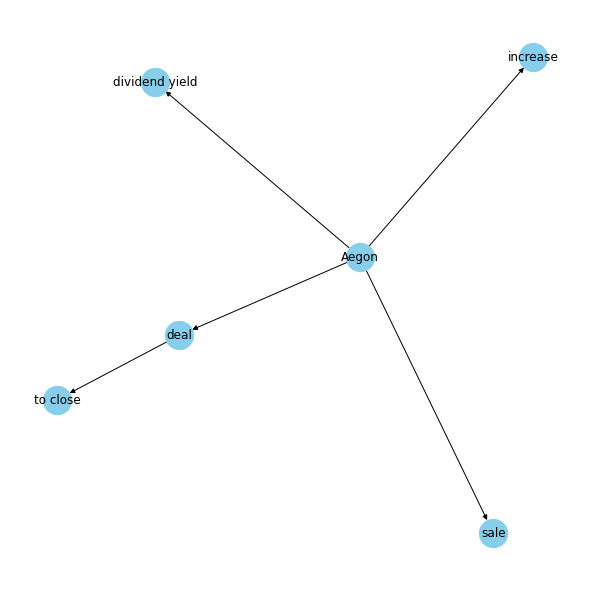

In [ ]:
nx_SG_d1 = nx.dfs_tree(G, source='Aegon', depth_limit=2)
plot_graph(nx_SG_d1)

In [ ]:
text= "A few years ago, the pension board of the Reform Judaism movement took Aperio up on its offer to create an E.S.G. investment option for its 403(b) plan. The board used 100 years of social justice resolutions to shape the composition of the portfolio. Then, it added another tenet to its investment philosophy in order to own additional shares of companies that were Israeli or had made investments in Israel.The fee for this customized investment is 0.15 percent annually for the first $10 million under management and then 0.10 percent beyond that. “You cannot find an E.S.G. mutual fund for that cheap in the marketplace,” said Michael Kimmel, the board’s chief executive. "

In [ ]:
# mkdir temp



In [ ]:
doc1 = nlp('Abhijit is a nice guy, he works at KPMG.')
print(doc1._.coref_clusters)

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip uninstall neuralcoref
!pip install neuralcoref --no-binary neuralcoref

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 378kB 9.2MB/s 
     |████████████████████████████████| 133kB 12.3MB/s 
     |████████████████████████████████| 71kB 6.0MB/s 
     |████████████████████████████████| 7.0MB 14.0MB/s 
Skipping wheel build for neuralcoref, due to binaries being disabled for it.
ERROR: botocore 1.19.33 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.
    Running setup.py install for neuralcoref ... done


In [ ]:
import pandas as pd
import re
import spacy
import neuralcoref

nlp = spacy.load('en_core_web_sm')
neuralcoref.add_to_pipe(nlp)


def get_entity_pairs(text, coref=True):
    
    # preprocess text
    text = re.sub(r'\n+', '.', text)  # replace multiple newlines with period
    text = re.sub(r'\[\d+\]', ' ', text)  # remove reference numbers
    text = nlp(text)
    if coref:
        text = nlp(text._.coref_resolved)  # resolve coreference clusters

    def refine_ent(ent, sent):
        unwanted_tokens = (
            'PRON',  # pronouns
            'PART',  # particle
            'DET',  # determiner
            'SCONJ',  # subordinating conjunction
            'PUNCT',  # punctuation
            'SYM',  # symbol
            'X',  # other
        )
        ent_type = ent.ent_type_  # get entity type
        if ent_type == '':
            ent_type = 'NOUN_CHUNK'
            ent = ' '.join(str(t.text) for t in
                           nlp(str(ent)) if t.pos_
                           not in unwanted_tokens and t.is_stop == False)
        elif ent_type in ('NOMINAL', 'CARDINAL', 'ORDINAL') and str(ent).find(' ') == -1:
            refined = ''
            for i in range(len(sent) - ent.i):
                if ent.nbor(i).pos_ not in ('VERB', 'PUNCT'):
                    refined += ' ' + str(ent.nbor(i))
                else:
                    ent = refined.strip()
                    break

        return ent, ent_type

    sentences = [sent.string.strip() for sent in text.sents]  # split text into sentences
    ent_pairs = []
    for sent in sentences:
        sent = nlp(sent)
        spans = list(sent.ents) + list(sent.noun_chunks)  # collect nodes
        spans = spacy.util.filter_spans(spans)
        with sent.retokenize() as retokenizer:
            [retokenizer.merge(span, attrs={'tag': span.root.tag,
                                            'dep': span.root.dep}) for span in spans]
        deps = [token.dep_ for token in sent]

        # limit our example to simple sentences with one subject and object
        if (deps.count('obj') + deps.count('dobj')) != 1\
                or (deps.count('subj') + deps.count('nsubj')) != 1:
            continue

        for token in sent:
            if token.dep_ not in ('obj', 'dobj'):  # identify object nodes
                continue
            subject = [w for w in token.head.lefts if w.dep_
                       in ('subj', 'nsubj')]  # identify subject nodes
            if subject:
                subject = subject[0]
                # identify relationship by root dependency
                relation = [w for w in token.ancestors if w.dep_ == 'ROOT']
                if relation:
                    relation = relation[0]
                    # add adposition or particle to relationship
                    if relation.nbor(1).pos_ in ('ADP', 'PART'):
                        relation = ' '.join((str(relation), str(relation.nbor(1))))
                else:
                    relation = 'unknown'

                subject, subject_type = refine_ent(subject, sent)
                token, object_type = refine_ent(token, sent)

                ent_pairs.append([str(subject), str(relation), str(token),
                                  str(subject_type), str(object_type)])

    ent_pairs = [sublist for sublist in ent_pairs
                          if not any(str(ent) == '' for ent in sublist)]
    pairs = pd.DataFrame(ent_pairs, columns=['subject', 'relation', 'object',
                                             'subject_type', 'object_type'])
    print('Entity pairs extracted:', str(len(ent_pairs)))

    return pair

In [ ]:
pairs = get_entity_pairs(ph)